# COGS 118A - Project Checkpoint

# Names

- Angkitha Anguraj
- Andres Villegas
- Hieu Pham
- Sujal Nahata
- Denny Yoo

# Abstract 
As time progresses, scientists and civilians alike are growing concerned by the increased frequency of earthquakes. Since earthquakes are a product of built-up tension between tectonic plates, they are often described as hard to predict. However, we believe utilizing what we have learned about supervised learning in combination with past earthquake data will help us magnitude of future earthquakes. This project aims to predict the magnitude of future earthquakes using machine learning techniques; we will use linear regression, regression decision trees, and feedforward neural networks. The dataset utilized is a public dataset from Kaggle that contains significant earthquakes from 1965-2016. We trained these models to describe our earthquake features in relation to the magnitude and predict magnitudes of future earthquakes, ultimately providing us insights into the relationship between earthquake features and magnitudes. This will help us prevent future earthquakes-related catastrophes. 

# Background

The National Earthquake Information Center (NEIC) is responsible for determining the location and magnitude of significant earthquakes worldwide and disseminating this information to relevant organizations and the general public<a name="usgs"></a>[<sup>[1]</sup>](#usgsnote). Since 1965, the NEIC has been maintaining a comprehensive earthquake database, which includes information on earthquakes with a magnitude of 5.5 or higher. This database serves as a crucial resource for scientific research and aids in earthquake prediction<a name="usgs"></a>[<sup>[1]</sup>](#usgsnote)<a name="neic"></a>[<sup>[2]</sup>](#neicnote).The NEIC relies on a variety of technologies to detect and locate earthquakes, including seismometers, GPS, and satellite imagery2. Seismometers detect ground motion caused by earthquakes and are capable of detecting earthquakes that occur anywhere on the planet<a name="neic"></a>[<sup>[2]</sup>](#neicnote). GPS technology can detect deformations in the Earth's crust caused by tectonic activity and can help scientists predict future earthquakes2. Satellite imagery can also provide information on changes in the Earth's surface, which may indicate the occurrence of an earthquake<a name="neic"></a>[<sup>[2]</sup>](#neicnote).
Earthquake prediction is of utmost importance, as it can help to minimize the damage and loss of life caused by these natural disasters<a name="wef"></a>[<sup>[3]</sup>](#wefnote). Seismologists and geologists have been studying earthquakes for many years, and detecting and reporting them accurately and promptly is a critical part of their work. The NEIC utilizes several techniques to determine the location and magnitude of earthquakes, including analyzing seismic waves and signals detected by seismometers<a name="usgs"></a>[<sup>[1]</sup>](#usgsnote). In recent years, advances in seismometer technology and data processing techniques have allowed for more precise measurements of seismic signals and faster processing of earthquake data<a name="wef"></a>[<sup>[3]</sup>](#wefnote).
The NEIC's earthquake database has been instrumental in identifying patterns and trends in earthquake activity, which can help in predicting future earthquakes<a name="usgs"></a>[<sup>[1]</sup>](#usgsnote). The ability to predict earthquakes accurately can aid in emergency management and disaster response, potentially saving many lives and minimizing damage to infrastructure<a name="wef"></a>[<sup>[3]</sup>](#wefnote).
Overall, earthquake research remains a critical area of study, and ongoing efforts to improve earthquake detection, reporting, and prediction will help to minimize the impact of these natural disasters on people and communities worldwide<a name="wef"></a>[<sup>[3]</sup>](#wefnote).


# Problem Statement

As the number and intensity of earthquakes has increased, it has become increasingly important to predict the magnitude of future earthquakes to determine whether there are earthquake-related catastrophes in our near future. The goal of our project is to predict the magnitude of future earthquakes; in doing so, we can prepare emergency supplies to those affected and prevent large scale loss of life.


# Data Wrangling

The dataset can be accessed at this link: https://www.kaggle.com/datasets/usgs/earthquake-database


The data was compiled by the United States Geological Survey (USGS), pulling from information provided by the National Earthquake Information Center (NEIC). It focuses on earthquakes that were recorded at 5.5 magnitude or higher from 1965 to 2016. 
There are over 23,000 data points with 21 different variables in the original dataset. However, the cleaned and prepared dataset consists of 7286 observations and 10 variables.


These variables include: latitude, longitude, depth, depth seismic stations, magnitude, magnitude seismic station, azimuthal gap, horizontal distance, root mean square, and grid location.


An observation will include data for each of these variables.


The critical feature variables will be: depth, depth seismic stations, magnitude, magnitude seismic station, azimuthal gap, horizontal distance, root mean square (a measurement of seismic waves), and grid location. Since all of these variables, in exception to grid location, have continuous numerical values, they are left in their raw form. Grid location is categorical and refers to the latitude-longitude section where each earthquake occurred. The critical classification variable will be magnitude. This is also numeric.


Cleaning was required to remove unnecessary columns for variables like ID and source. This is because the values for these variables were either identical across all observations or were obviously irrelevant for predicting magnitudes. Additionally, observations without values for some of the variables or NaN values were removed because they cannot be used in a holistic model. Finally, a new variable, grid location, was made using the input of each observation’s latitude and longitude and fitting it in a categorical grid. For each entry of grid location, the letter represents the latitude boundary and the number represents the longitude boundary.


In [38]:
import pandas as pd
from sklearn.utils import shuffle

# Remove irrelevant data points and null observations
data = pd.read_csv('database.csv')
data = data[data['Type'] == 'Earthquake']
data = data.fillna(0)

# Remove irrelevant feature columns
data = data.drop(labels=['Magnitude Error','Date','Time','Depth Error','Horizontal Error','ID',
                         'Source','Type','Location Source','Magnitude Source','Status', 'Magnitude Type',
                         'Depth Seismic Stations', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance'],axis=1)

# Shuffle the data and separate feature data from labels
data = shuffle(data).reset_index(drop=True)
X = data.drop(labels = ['Magnitude'], axis=1)
y = data['Magnitude']

data

,Latitude,Longitude,Depth,Magnitude,Root Mean Square
0,7.5014,136.769,5.0,5.6,0.59
1,-5.5040,149.711,136.6,5.7,0.94
2,-1.9560,139.306,33.0,5.7,0.00
3,-32.0830,-177.918,20.0,6.2,0.00
4,-8.2920,118.370,20.0,6.5,1.15
...,...,...,...,...,...
23227,-21.6820,170.471,115.6,5.8,0.90
23228,47.3580,145.718,387.0,5.8,0.00
23229,-19.2040,169.089,158.0,5.7,1.10
23230,2.2050,96.829,23.0,6.1,1.19


# Benchmark Model

In order to better understand our data and have a model to compare our results to, our group utilized Kaggle’s “Code” feature to look through past Kaggle users’ projects. We chose to focus on user Jia Yi’s project on “Predicting Earthquakes with Neural Networks”. They utilized only the date, time, latitude, longitude, depth, and magnitude features of the dataset. They first plotted the affected areas utilizing Matplotlib’s basemap tool and Python’s built in datetime library. Then, they began to split their data. Their X features were latitude, longitude, and time while their y features were depth and magnitude. Using the Keras deep learning API, they instantiated their model and utilized GridSearchCV in a method similar to what we performed in class to tune their hyperparameters. Afterwards, they used the sequential model within Keras to fit their model and derive their accuracy. Their final accuracy amounted to 0.98. 


# Proposed Solution

After receiving feedback from instructors, we decided it would be best to predict only the magnitude of future earthquakes utilizing three models: a linear regression, a regression tree, and a neural network. We chose not to predict other features as the models we studied in class equip us to predict one feature per model. 

In order to better visualize where earthquakes occur, we converted the longitude and latitude coordinates featured in our dataset into grid locations (analogous to a chess board). We would graph the earthquakes on this grid and utilize the grid coordinate as one of our features. 

Since magnitudes are an integral in interpreting the danger of earthquakes and are continuous numerical values, we chose to use linear regression; it has the ability to accurately model relationships and predict continuous numerical values. In this case, the features of our model would be the grid coordinate, depth, and azimuthal gap. Using these, we will predict the magnitude as our data point. In order to test the accuracy of this model, we will use mean squared error.

On the other hand, we plan on using a regression decision tree. This model is similar to linear regression. Its only difference is that it uses decision partitioning to make its regression. The variables we’ll feed into the decision tree will stay the same as the previous model. Each of these will act as a split for the model. A regression decision tree model is appropriate for our project as it’s good for predicting a singular numerical value. We will then use cross validation to check the accuracy of our model’s results. 

Finally, after researching, we decided to use feedforward neural networks featured in PyTorch as our neural network model. Since predicting magnitude is a regression based problem and our data is tabular in nature a feedforward neural network works best. We do not need to use a CNN as they’re typically used for image processing or data with spatial relationships. RNNs are off the table as they aren’t applicable to tabular data. Again, the features remain the same as the previous models. Since the size of our dataset is big, we aim to create a model using 40-50% of our dataset. We will train our neural network and fit it to our split dataset. To validate the accuracy of our neural network, we will calculate the loss/error for our batches of data and use functions similar to those within discussion lab eight to calculate the final accuracy. 

To first clean our data, we will utilize Pandas. To create the aforementioned grid coordinates and graph our data, we will need to import Matplotlib and Seaborn. In addition, given that we mainly utilize regression models, we will need to import Numpy, Scikit-Learn, and PyTorch (and the necessary functions and libraries). All these in conjunction with one another will help us predict the magnitude of future earthquakes and validate the accuracy of our predictions. We will finalize whichever model produces the highest accuracy. 


In [39]:
# Import necessary libraries and tools

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import copy

# Linear Regression

In [53]:
lin_model = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

print('mean_squared_error : ', mean_squared_error(y_test, y_pred))

mean_squared_error :  0.18670090861835908


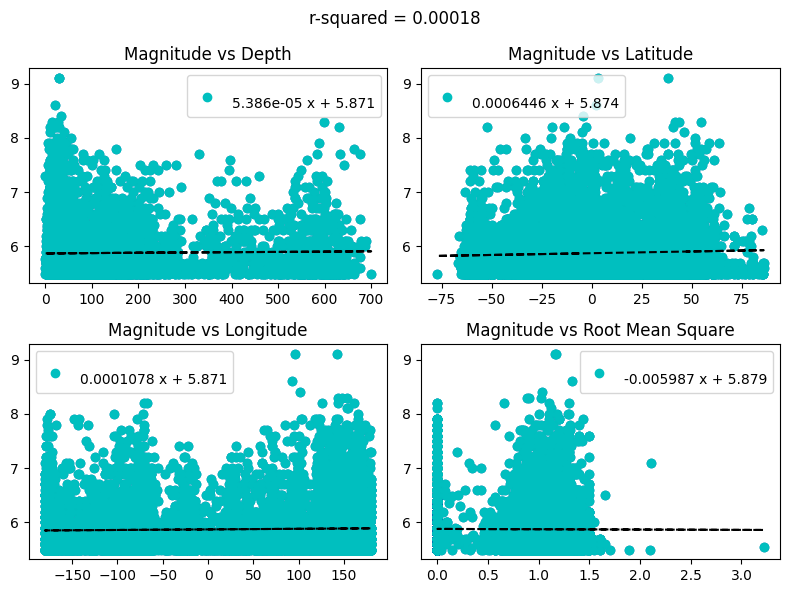

In [55]:
fig, axs = plt.subplots(figsize = (8, 6), nrows = 2, ncols = 2, sharex = False, sharey = False)

axs[0, 0].scatter(X_train['Depth'], y_train)
m,b = np.polyfit(X_train['Depth'], y_train, 1)
coef = np.polyfit(X_train['Depth'], y_train,1)
poly1d_fn = np.poly1d(coef) 
line1 = axs[0, 0].plot(X_train['Depth'], y_train, 'co', X_train['Depth'], poly1d_fn(X_train['Depth']), '--k')
axs[0, 0].title.set_text('Magnitude vs Depth')
axs[0, 0].legend((line1),('{}'.format(poly1d_fn),))


axs[0, 1].scatter(X_train['Latitude'], y_train)
m,b = np.polyfit(X_train['Latitude'], y_train, 1)
coef = np.polyfit(X_train['Latitude'], y_train,1)
poly1d_fn = np.poly1d(coef) 
line2 = axs[0, 1].plot(X_train['Latitude'], y_train, 'co', X_train['Latitude'], poly1d_fn(X_train['Latitude']), '--k')
axs[0, 1].title.set_text('Magnitude vs Latitude')
axs[0, 1].legend((line2),('{}'.format(poly1d_fn),))


axs[1, 0].scatter(X_train['Longitude'], y_train)
m,b = np.polyfit(X_train['Longitude'], y_train, 1)
coef = np.polyfit(X_train['Longitude'], y_train,1)
poly1d_fn = np.poly1d(coef) 
line3 = axs[1, 0].plot(X_train['Longitude'], y_train, 'co', X_train['Longitude'], poly1d_fn(X_train['Longitude']), '--k')
axs[1, 0].title.set_text('Magnitude vs Longitude')
axs[1, 0].legend((line3),('{}'.format(poly1d_fn),))


axs[1, 1].scatter(X_train['Root Mean Square'], y_train)
m,b = np.polyfit(X_train['Root Mean Square'], y_train, 1)
coef = np.polyfit(X_train['Root Mean Square'], y_train,1)
poly1d_fn = np.poly1d(coef) 
line4 = axs[1, 1].plot(X_train['Root Mean Square'], y_train, 'co', X_train['Root Mean Square'], poly1d_fn(X_train['Root Mean Square']), '--k')
axs[1, 1].title.set_text('Magnitude vs Root Mean Square')
axs[1, 1].legend((line4),('{}'.format(poly1d_fn),))

fig.suptitle("r-squared = {:.5f}".format(r2_score(y_test, y_pred)))
fig.tight_layout()

# Decision Tree

Model 1 MSE: 0.1734
R2 score: 0.0440
Model 2 MSE: 0.1714
R2 score: 0.0550
Model 3 MSE: 0.1702
R2 score: 0.0615
Model 4 MSE: 0.1689
R2 score: 0.0685
Model 5 MSE: 0.1671
R2 score: 0.0785
Model 6 MSE: 0.1666
R2 score: 0.0814
Model 7 MSE: 0.1666
R2 score: 0.0815
Model 8 MSE: 0.1685
R2 score: 0.0709


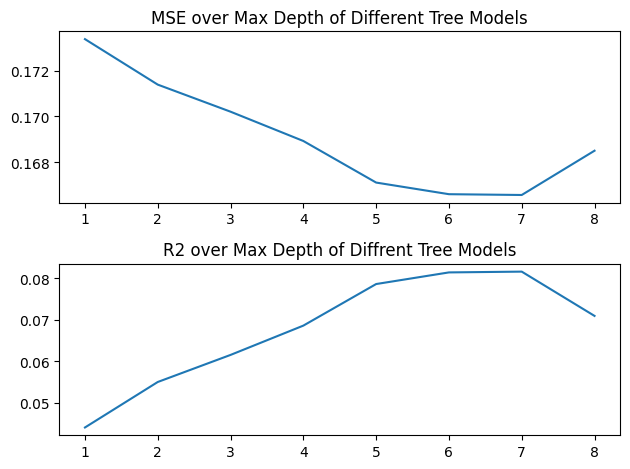

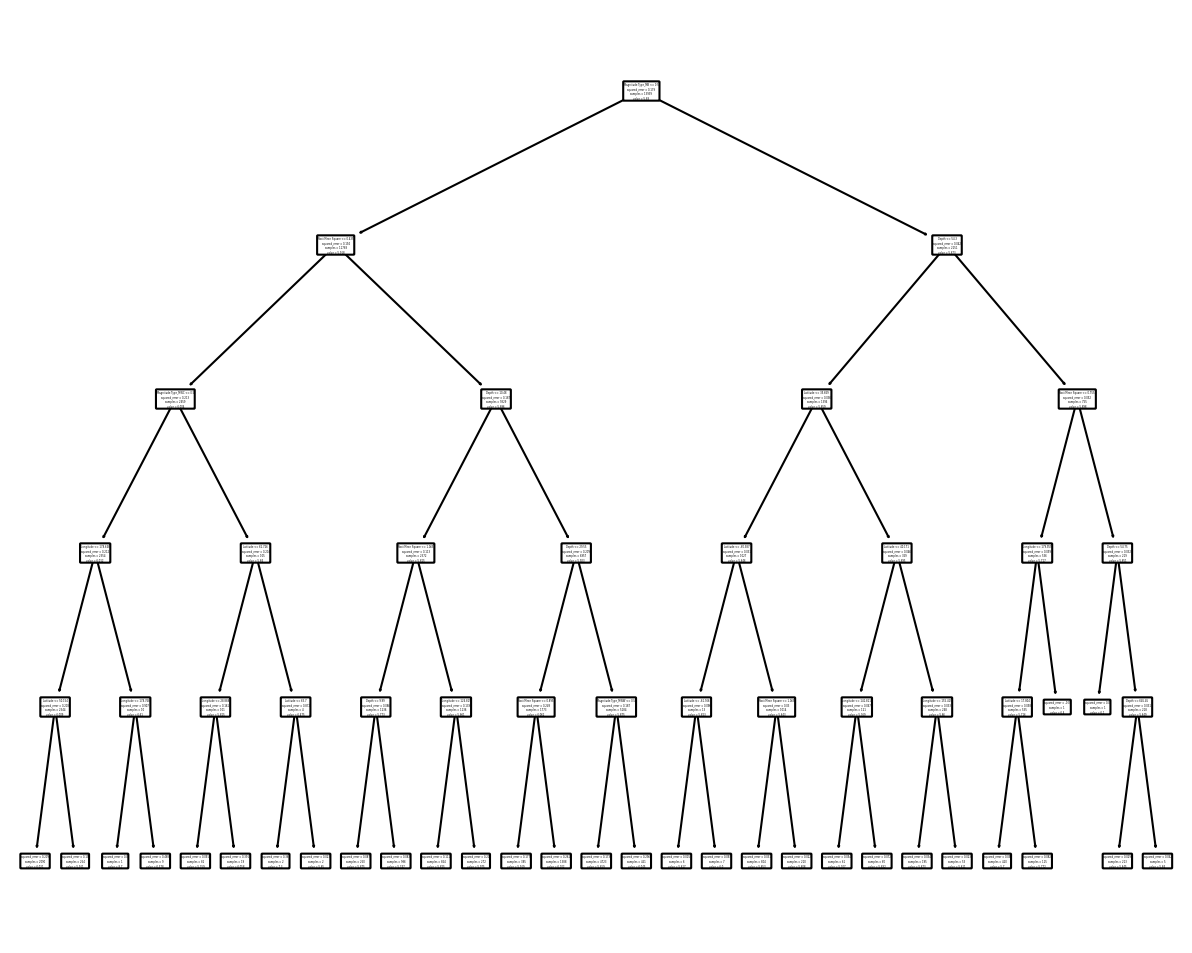

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree
# Defining arrays for all of the scores
mseScore = []
r2Score = []

for i in range(1,9):
    # Train a decision tree regression model on the training data.
    treeModel = DecisionTreeRegressor(max_depth=i)
    treeModel.fit(X_train, y_train)
    

    # Predicting and getting the scores of the model (MSE and R2)
    y_pred = treeModel.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mseScore.append(mse)
    r2 = r2_score(y_test, y_pred)
    r2Score.append(r2)
    print("Model {} MSE: {:.4f}".format(i,mse))
    print("R2 score: {:.4f}".format(r2))

# Creating plots of the MSE and R2 of Max Depth of Different Tree Models
mseArray = np.array(mseScore)
r2Array = np.array(r2Score)
x = np.array([1,2,3,4,5,6,7,8])

msePlot = plt.subplot(2, 1, 1)
plt.plot(x,mseArray)
msePlot.set_title("MSE over Max Depth of Different Tree Models")
r2Plot = plt.subplot(2, 1, 2)
plt.plot(x,r2Array)
r2Plot.set_title("R2 over Max Depth of Diffrent Tree Models")
plt.tight_layout()

tree5Model = DecisionTreeRegressor(max_depth=5)
tree5Model.fit(X_train, y_train)

# Plot a decision tree based on prediction
plt.figure(figsize=(10,8), dpi=150)
plot_tree(tree5Model, feature_names=X.columns, rounded=True)

# show the plot
plt.show()

# Neural Network

In [6]:
# Convert the data to tensors so PyTorch can use the data
class Data(Dataset):
    def __init__(self, neural_X, y):
        self.neural_X = torch.from_numpy(neural_X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.neural_X.shape[0]

    def __getitem__(self, index):
        return self.neural_X[index], self.y[index]

    def __len__(self):
        return self.len

# Establish fixed settings for the nueral network
batch_size = 150
num_epochs = 80
learning_rate = 0.001
num_classes = 1
input_size = (X_train.shape[1])
hidden_size = 500
n_total_batches = 30

# Choose training and test data by batches and convert them into tensors
train_data = Data(X_train.to_numpy(), y_train.to_numpy())
train_dataloader = DataLoader(dataset= train_data, batch_size= batch_size, shuffle=True)
test_data = Data(X_test.to_numpy(), y_test.to_numpy())
test_dataloader = DataLoader(dataset= test_data, batch_size= batch_size, shuffle=True)

In [7]:
# Generate a model with an input layer, hidden layer, and output layer
class NeuralNet(nn.Module):
    
    # Initializes the neural network and sets its parameters. 
    # It takes three arguments:
    #   input_size - the size of the input layer determined by the amount of features
    #   hidden_size - the number of neurons in the hidden layer
    #   num_classes - the number of output classes, which is 1 since we're only predicting a continuous magnitude value
    
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        
        # Create the first linear layer
        self.l1 = nn.Linear(input_size , hidden_size)
        # Use ReLU on the first layer
        self.relu = nn.ReLU() 
        
        # Produe the final layer by connecting the hidden layer with 500 neurons to the second layer
        self.l2 = nn.Linear(hidden_size, num_classes)
 

    # Define how the input data is processed through the neural network
    # Connect each layer together as following:  l1 -> relu -> l2
    def forward(self, x):
        x = self.relu(self.l1(x))
        out = self.relu(self.l2(x))
        return out
    

# Create an instance of NeuralNet and store it in model
model = NeuralNet(input_size, hidden_size, num_classes)

model

NeuralNet(
  (l1): Linear(in_features=14, out_features=500, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=500, out_features=1, bias=True)
)

In [8]:
# Use mean squared error (MSE) to evaluate the loss on the model
# Instantiate optimizer with a specified learning rate
loss_func = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Epoch [1/80], Batch [10/30], Training Loss: 34.7572
Epoch [1/80], Batch [20/30], Training Loss: 34.7572
Epoch [1/80], Batch [30/30], Training Loss: 34.7572
Epoch [2/80], Batch [10/30], Training Loss: 34.7572
Epoch [2/80], Batch [20/30], Training Loss: 34.7572
Epoch [2/80], Batch [30/30], Training Loss: 34.7572
Epoch [3/80], Batch [10/30], Training Loss: 34.7572
Epoch [3/80], Batch [20/30], Training Loss: 34.7572
Epoch [3/80], Batch [30/30], Training Loss: 34.7572
Epoch [4/80], Batch [10/30], Training Loss: 34.7572
Epoch [4/80], Batch [20/30], Training Loss: 34.7572
Epoch [4/80], Batch [30/30], Training Loss: 34.7572
Epoch [5/80], Batch [10/30], Training Loss: 34.7572
Epoch [5/80], Batch [20/30], Training Loss: 34.7572
Epoch [5/80], Batch [30/30], Training Loss: 34.7572
Epoch [6/80], Batch [10/30], Training Loss: 34.7572
Epoch [6/80], Batch [20/30], Training Loss: 34.7572
Epoch [6/80], Batch [30/30], Training Loss: 34.7572
Epoch [7/80], Batch [10/30], Training Loss: 34.7572
Epoch [7/80]

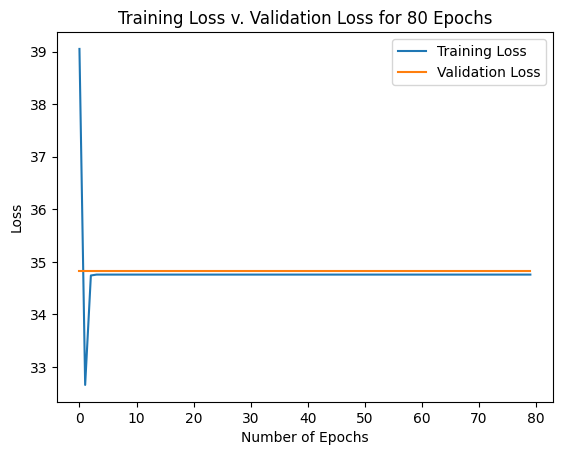

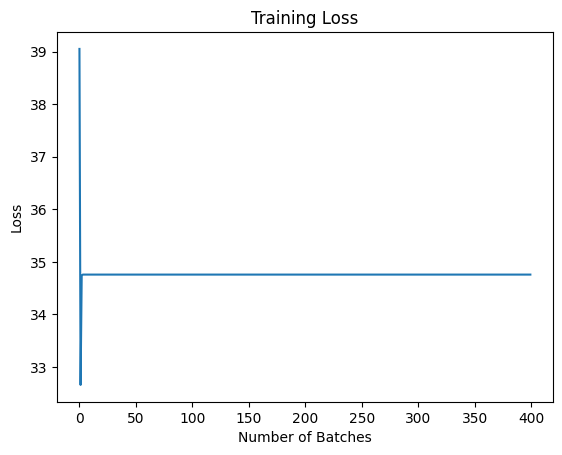

In [9]:
# Determine the supported device
def get_device():
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu') # use the CPU if the GPU isn't available
    return device

# Convert a dataframe to tensors to be used with PyTorch
def df_to_tensor(df):
    device = get_device()
    return torch.from_numpy(df.values).float().to(device)

# Convert data to tensors to train the model
neural_X_train = df_to_tensor(X_train)
neural_y_train = df_to_tensor(y_train).reshape(-1, 1)
neural_X_test = df_to_tensor(X_test)
neural_y_test = df_to_tensor(y_test).reshape(-1, 1)

# Instantiating the optimal mse, weights, and losses vectors
optimal_mse = np.inf
optimal_weights = None
training_losses = []
validation_losses = []

model.train()
for epoch in range(num_epochs):
    for i in range(n_total_batches): # Dataloader pulls a batch and uses it for training
        X_batch = neural_X_train[i:i+batch_size]
        y_batch = neural_y_train[i:i+batch_size]
        
        y_pred = model(X_batch)
        loss = loss_func(y_pred, y_batch)
        
        # Perform a backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Evaluate accuracy using training loss
        model.eval()
        y_pred = model(neural_X_train)
        mse = float(loss_func(y_pred, neural_y_train))
        training_losses.append(mse)
        if (i+1) % 10 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{n_total_batches}], Training Loss: {mse:.4f}')

    # Evaluate accuracy using validation loss
    model.eval()
    y_pred = model(neural_X_test)
    mse = float(loss_func(y_pred, neural_y_test))
    validation_losses.append(mse)

    # Identify the weights that produce the lowest validation loss
    if(mse < optimal_mse):
        optimal_mse = mse
        optimal_weights = copy.deepcopy(model.state_dict())

# Store the optimal weights and print the error with those weights
model.load_state_dict(optimal_weights)
print("Optimal MSE: %.2f" % optimal_mse)
print("Optimal RMSE: %.2f" % np.sqrt(optimal_mse))

# Plot the training loss and validation loss against each other
plt.plot(training_losses[0:num_epochs], label = "Training Loss")
plt.plot(validation_losses, label = "Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss v. Validation Loss for {} Epochs".format(num_epochs))
plt.show()

# Plot the training loss over batches to show convergance
plt.plot(training_losses[0:400], label = "Training Loss")
plt.xlabel("Number of Batches")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

# Evaluation Metrics

Since one of the models we are using is a linear regression model, the most appropriate evaluation metric to use for this is mean squared error. Since the predictions of our model are continuous values, this will give us a quantitative overview of how far off the actual values are from the predicted values.

mean squared error = $\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i})^2 =\frac{1}{n}\sum_{i=1}^{n}(y_i-mx_i+b)^2,\\$
where $mx+b$ is the linear regression model with weight vector m and constant vector b.

In addition, we will utilize k-fold cross validation to verify the accuracy of our decision tree results. Cross validation works in that we split our data into chunks and run our decision tree model on all but a specific split number of chunks. These chunks then become the set that we test on; we then run our model as many times as there chunks as we use each chunk to test. We then compare our tests and graph our results to see which split number produced the best results. 



# Ethics & Privacy

We believe that everything in our research process, from data retrieval to predictive modeling, will  be conducted ethically. Firstly, when making generalizations about future earthquakes that may happen around the world, it is important to have data that is sufficiently representative of all earthquake prone areas around the world. Otherwise, data that is concentrated on certain earthquakes in only a few locations or during a small period of time would be heavily biased and may lead to severe miscalculations for other geographical areas. To address this, we use data from every significant earthquake that has occurred on Earth between 1965 and 2016. Furthermore, all the data from this dataset were collected by researchers on behalf of the National Earthquake Information Center. These researchers had governmental permission to collect and publicly report data from these earthquake sites. Thus, there is no privacy breach involved in the data collection process. The most important concern with our research is the unintended consequences it may have. If the model proves to perform poorly in the real world, it may unnecessarily lead to earthquake paranoia in some areas while undermining the likelihood of earthquakes happening in other areas, leading to underpreparedness. We understand that our model will be far from perfect or comprehensive enough to make real-time predictions. As such, we will create our model for purely educational purposes and do not intend to publicize our findings.

# Team Expectations 

* If a teammate has any problems completing their work or making it to meetings, they must communicate it with the rest of the team during a meeting or on our team Discord server.
* During each meeting, we will delegate tasks and provide constructive feedback of each others’ work to efficiently finish the project.
* After completing individually assigned work, we will conduct a collective project review on the day of each milestone/section deadline to ensure quality.
* If any group conflict or individual difficulty arises, we should do our best to help each other and create additional meetings if necessary.

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/17  |  3 PM |  Brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/19  |  2 PM |  Look through data set, brainstorm any questions, review project proposal requirements | Delegate project proposal tasks, work on timeline together, decide future meeting dates | 
| 2/26  | 2 PM  | Finish project proposal and submit through GitHub  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 3/5  | 2 PM  | Import & Wrangle Data ,do some EDA | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 3/11  | 12 PM  | Finalize wrangling/EDA; Begin programming for project | Discuss/edit project code; Complete project |
| 3/13  | 2 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 3/19  | 2 PM  | Finish individual review of the project | Turn in Final Project  |

# Footnotes
<a name = "usgsnote"></a> 1.[^](#usgs): "National Earthquake Information Center (NEIC)." U.S. Geological Survey, https://www.usgs.gov/programs/earthquake-hazards/national-earthquake-information-center-neic<br>
<a name = "neicnote"></a> 2.[^](#neic)“NEIC - the National Earthquake Information Center” U.S. Geological Survey. (n.d.). Earthquake Hazards Program. ScienceBase. https://www.sciencebase.gov/catalog/item/505a613ee4b0c8380cd71885<br>
<a name = "wefnote"></a> 3.[^](#wef)"The science of earthquake prediction explained." World Economic Forum, 15 Aug. 2016, https://www.weforum.org/agenda/2016/08/the-science-of-earthquake-prediction-explained/<br>
